# 2.3 - Classification using kNN

__Input__: Dataset $((x_{11}, x_{12}, \cdots, x_{1n}, y_1), (x_{21}, x_{22}, \cdots, x_{2n}, y_2), \cdots, (x_{N1}, x_{N2}, \cdots, x_{Nn}, y_N))$ with **multiple** (n) features and a response variable, with $P$ measurements

__Purpose__: predict a response value $\hat{y_p}$ for any given predictor $X_p = (x_{p1}, x_{p2}, ..., x_{pn})$

__Approach__: find the most common class among the neighborhood of $X_p$ (the points with the smallest distance)

__Assumptions__: None. Can increase bias if dataset is already biased. 

__Hyperparameters__: $k$, number of nearest neighbors, metric with which to compute distance.

Given some new feature $X_p$, proceed as follows:
1. Compute the distance $\mathrm{dist}(X_p, X_i)$ from $X_p$ to all other values $X_i$ (i=1:N) in the dataset. This is using some chosen distance metric.
2. Select the $k$ points with the smallest distances (nearest neighbors) into a neighborhood $\Omega$. 
3. Find the most common class $y_k$ in this neighborhood, and make $\hat{y} = y_k$. 

In [53]:
import numpy as np
from scipy.stats import mode

def most_common_value(arr):
    mode_result = mode(arr)
    return mode_result.mode

class KNNClassifierManual:
    def __init__(self, k=1):
        self.k = k

    def fit(self, X_train, y_train):
        """
        Train the KNNClassifier model.
        - X_train (numpy.ndarray): Training data features.
        - y_train (numpy.ndarray): Training data labels.
        """
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = np.zeros(len(X_test), dtype=np.int32)
        for i, x in enumerate(X_test):
            distances = np.sqrt(np.sum((self.X_train - x) ** 2, axis=1))
            nearest_neighbors = np.argsort(distances)[:self.k]  #for each point in X_test, find closest points in X_train
            most_common = most_common_value(self.y_train[nearest_neighbors])
            predictions[i] = most_common
        return predictions


In [54]:
# Generate example following Logistic Function
import random
import numpy as np
import matplotlib.pyplot as plt

def logistic(x, true_intercept, true_slope):
    exp_term = np.exp(true_intercept + true_slope * x)
    return exp_term / (1 + exp_term)

x_min = 1; x_max = 90; num_xs = 1000

x_vals = np.array([random.randint(x_min, x_max) for _ in range(num_xs)])  #ages
X_vals = x_vals.reshape(-1, 1)


true_intercept = -2
true_slope = 0.05

y_vals = logistic(x_vals, true_intercept, true_slope) #generate continuous values
y_binary = np.array([1 if y > 0.5 else 0 for y in y_vals]) # discretize into two classes

Accuracy = 1.0


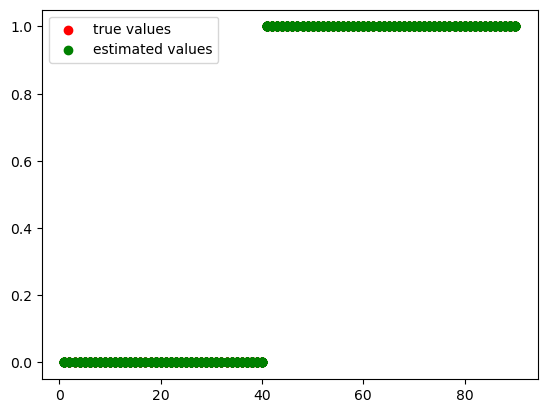

In [57]:
model = KNNClassifierManual(k=2)
model.fit(X_vals, y_binary)
predictions = model.predict(X_vals)

accuracy = np.mean(np.array(predictions) == np.array(y_binary))
print(f'Accuracy = {accuracy}')

plt.scatter(x_vals, y_binary, color='red', label = 'true values')
plt.scatter(X_vals, predictions, color='green', label = 'estimated values')
plt.legend()